### sklearn 라이브러리를 이용한 outlier detecting

### outlier detecting 및 새로운 변수가 들어왔을 때(novelty) 아웃라이어인지 판단하는 방법
1. one class svm: 이 방법은 novelty의 방법으로 설명하고 있다.

2. fitting an elliptic envelope: 분포를 미리 알고 있었을 때, 사용하는 방법이라고 한다.

3. Isolation Forest: 높은 차원의 dataset에 사용하는 것이 유용하고, Random Forest를 이용하는 방법이라고 한다. random으로 칼럼을 선택한 후, 선택된 칼럼의 최대값과 최소값을 분리하는 값을 random으로 선택한다.

4. Local Outlier Factor: 높은 차원의 dataset에 유용한 또 다른 방법으로, Local Outlier Factor(LOF) 알고리즘을 사용하는 방법이라고 한다. 주어진 데이터의 그 이웃들과 local density deviation을 구하고, 그들의 이웃보다 충분히 낮은 density를 갖는 샘플을 찾는 방법이라고 한다. 군집화 알고리즘인 k-means와 유사하다고 한다.

### Isolation Forest와 Local Outier Factor가 많은 경우에 대체로 우수

### 1. Isolation Forest
There are two training parameters in this method: the training parameters are the number of trees to build and subsampling size

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest as isf
import gc
from sklearn.model_selection import train_test_split

In [115]:
data = pd.read_csv("./data/Reshaped_Data.csv")

In [117]:
train_df, sample_df = train_test_split(data, train_size = 0.8)

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [118]:
sample_df.head()

,Id,assists,boosts,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,Weighted,winPlacePerc
1386297,491b5f42aea5b3,0,0,0,0,0,0,0,0.0000,2,50,0,0.0,0.0,52.76,1,486.367766,0.0816
4305022,2ddc3804d8de22,1,2,0,0,2,0,0,0.0000,3,29,1,0.0,0.0,729.60,2,480.922081,0.5714
1733479,81727339c504cf,1,1,1,0,1,1,1,15.7500,2,50,0,0.0,0.0,437.50,3,461.692005,0.5510
2607004,413c8501788ebd,1,0,2,0,0,1,1,0.9706,3,26,1,0.0,0.0,599.20,5,453.863832,0.3200
1933221,f24d19808cb913,0,0,1,0,0,2,2,49.8200,2,49,0,0.0,160.6,2815.00,4,559.884518,0.8542


In [ ]:
del sample_df['Id']

In [122]:
sample_df = sample_df[sample_df['matchType']==2]

In [27]:
# 1000개를 가지고 IsolationForest를 이용하여 학습시킴
clf = isf(n_estimators=100, max_samples=1000)

In [123]:
#Train the model with the data.
clf.fit(sample_df)

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\iforest.py:214: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\user\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=500, n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [124]:
# The Anomaly scores are calclated for each observation and stored in 'scores_pred'
scores_pred = clf.decision_function(sample_df)

In [125]:
print(len(scores_pred))
print(len(sample_df))

262131
262131


In [126]:
sample_df['scores'] = scores_pred

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Based on (Liu and Ting, 2008), anomalous observation is scored close to 1 
# and non anamolous observations are scored close to zero. 
# I have written a simple loop that will count the number of observation that has score more than 0.5 and is actually anomalous.

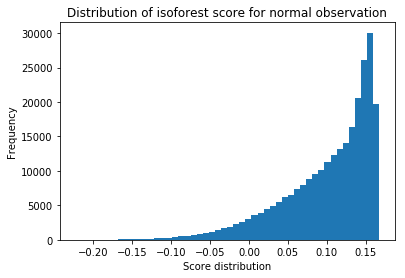

In [127]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
normal = plt.hist(sample_df.scores, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for normal observation")
plt.show()

### 해당 그래프는 정상적인 observation임

In [128]:
del sample_df['scores']

### predict

In [129]:
y_pred_outliers = clf.predict(sample_df)

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [130]:
out = pd.DataFrame(y_pred_outliers)
out = out.rename(columns={0: "out"})
sample_df['out'] = y_pred_outliers

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
out_df[out_df['out']==-1]

,assists,boosts,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,maxPlace,revives,rideDistance,swimDistance,walkDistance,weaponsAcquired,Weighted,winPlacePerc,out
64246,0,0,0,1,0,2,2,45.380,91,0,0.0,0.0,208.500,2,515.297970,0.3111,-1
229806,0,0,0,0,0,1,1,1.051,97,0,0.0,0.0,26.130,2,494.876650,0.0938,-1
266409,0,0,0,0,0,1,1,85.930,98,0,1566.0,0.0,998.300,7,509.171574,0.6392,-1
231665,0,0,0,0,5,0,0,0.000,94,0,0.0,0.0,423.600,3,504.746954,0.3763,-1
213494,0,0,0,0,0,0,0,0.000,95,0,0.0,0.0,31.880,0,513.936548,0.0957,-1
367045,0,0,0,0,0,0,0,0.000,96,0,0.0,0.0,164.300,3,510.532995,0.1474,-1
53663,0,3,0,3,4,3,1,133.100,94,0,0.0,0.0,3182.000,6,551.375635,0.8817,-1
227927,0,7,0,3,5,7,2,265.900,97,0,5615.0,0.0,2646.000,7,503.725888,0.8958,-1
59055,0,3,0,0,1,0,0,0.000,94,0,7763.0,0.0,877.900,11,472.923731,0.7097,-1
190848,0,1,0,0,0,1,1,24.940,88,0,5924.0,0.0,1127.000,5,552.737056,0.6092,-1


### 별로 우리 데이터에는 아웃라이어가 해당되지 않아 보입니다.

### 2. Local Outier Factor